In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix

In [42]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier(class_weight = "balanced")

In [43]:
df = pd.read_csv("heart.csv")

In [44]:
from sklearn.preprocessing import Normalizer

In [52]:
#train_test_split
x=df.drop(columns=["target"])
y=df["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=51)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


In [53]:
Nz= Normalizer()
x_train = Nz.fit_transform(x_train)
x_test = Nz.transform(x_test)

In [54]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [55]:
y_test_pred = RFC.predict_proba(x_test)

# GRIDSEARCH

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
params = {"criterion":['gini', 'entropy'], "max_depth":[i for i in np.arange(1,16)],"max_features":[3,4,5], "n_jobs":[-1]}

In [58]:
GS = GridSearchCV(RFC , param_grid =params , n_jobs=-1)

In [59]:
GS.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                          

In [60]:
GS.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=1, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

# ROC CURVE

In [61]:
RFC= RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [62]:
RFC.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=4, max_features=4,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [63]:
y_test_pred = RFC.predict_proba(x_test)

In [64]:
from sklearn.metrics import roc_curve

In [65]:
fpr, tpr , thresholds = roc_curve(y_test, [i[1] for i in y_test_pred])

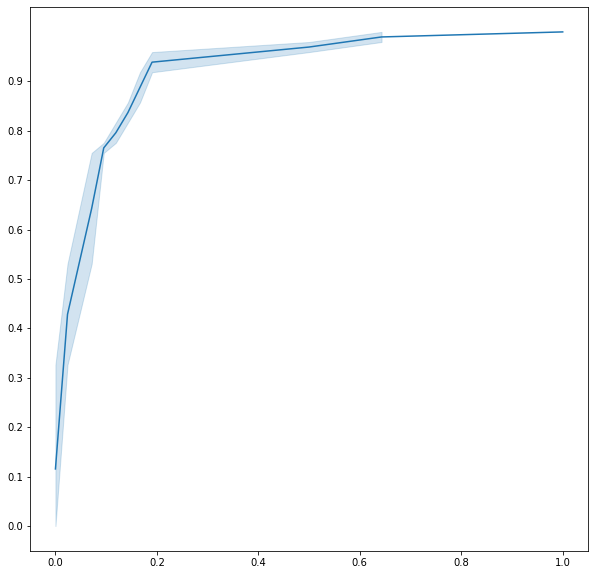

In [66]:
plt.figure(figsize=(10,10))
plt.yticks(np.arange(0, 1,0.1))
sns.lineplot(x=fpr,y=tpr)


In [67]:
df_roc = pd.DataFrame(thresholds , columns = ["thresholds"])

In [68]:
df_roc["tpr"]=tpr

In [69]:
df_roc["fpr"]=fpr

In [70]:
df_roc

,thresholds,tpr,fpr
0,1.959282,0.000000,0.000000
1,0.959282,0.020408,0.000000
2,0.858659,0.326531,0.000000
3,0.853234,0.326531,0.023810
4,0.782791,0.530612,0.023810
5,0.744077,0.530612,0.071429
6,0.656421,0.755102,0.071429
7,0.650712,0.755102,0.095238
8,0.632688,0.775510,0.095238
9,0.620806,0.775510,0.119048


## looks like 0.55 is the ideal threshold 

In [170]:
y_test_pred_thrsh = [0 if i[0]>0.5 else 1 for i in y_test_pred]  

In [176]:
np.array(y_test_pred_thrsh)                       #condition isnt working

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0])

In [184]:
y_pred_test_balanced = RFC.predict(x_test)

In [185]:
np.array(y_pred_test_balanced)

array([0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0], dtype=int64)

In [177]:
y_test_pred_thrsh = [0 if i[0]>0.55 else 1 for i in y_test_pred]

In [178]:
precision = precision_score(y_test,y_test_pred_thrsh)

In [179]:
recall = recall_score(y_test,y_test_pred_thrsh)

In [180]:
precision

0.8392857142857143

In [181]:
recall

0.9591836734693877

In [182]:
f1 = fbeta_score(y_test,y_test_pred_thrsh,beta=1)

In [183]:
f1

0.8952380952380952